# Mall Customers Dataset - Exploratory Data Analysis and Clustering

This repository contains an analysis of the Mall Customers dataset, which includes the following features:

1. CustomerID: Unique ID given to each customer.
2. Gender: Gender of the customer (Male or Female).
3. Age: Age of the customer.
4. Annual Income (k$): Annual income of the customer in thousands of dollars.
5. Spending Score: A score (out of 100) given to the customer by the mall authorities based on their spending behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
customer = pd.read_csv('datasets\Mall_Customers.csv')
print(customer.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [4]:
customer.shape

(200, 5)

In [5]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
customer.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_24124\742528883.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  customer.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_24124\2916413038.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer['Annual Income (k$)'])


Text(0, 0.5, 'Count')

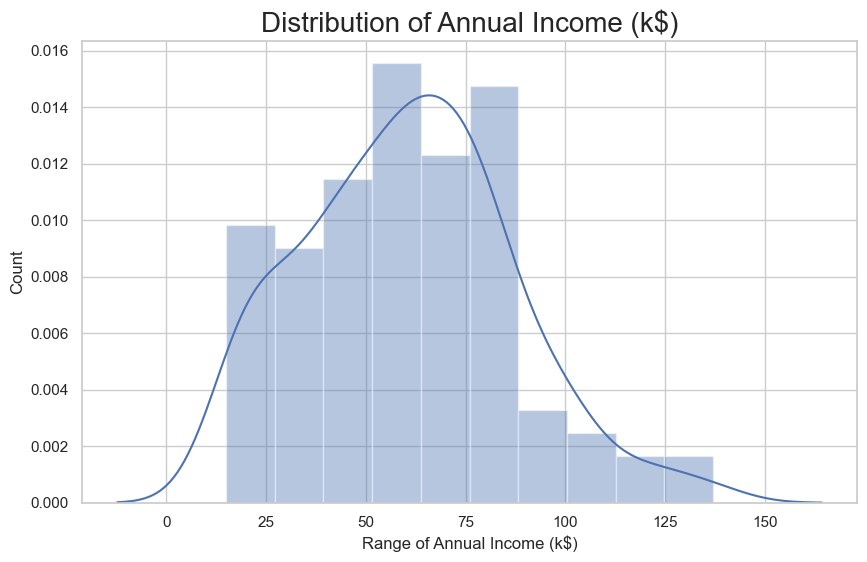

In [8]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(customer['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

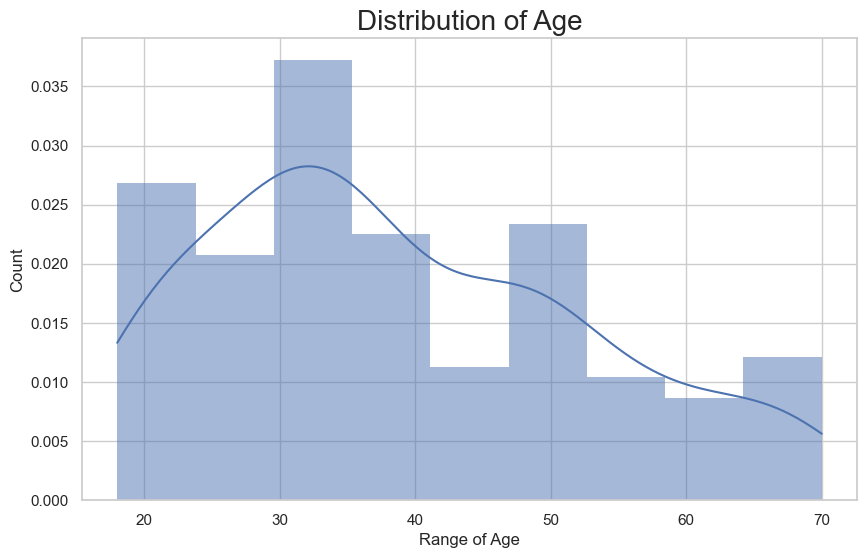

In [9]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(customer['Age'], kde=True, stat="density", linewidth=0)
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

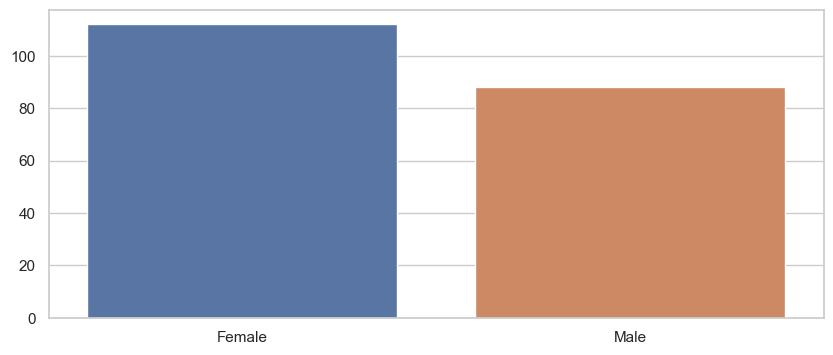

In [12]:
genders = customer.Gender.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [13]:
### Feature selection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
customer_data= customer.iloc[:, [3,4]]

In [14]:
customer_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


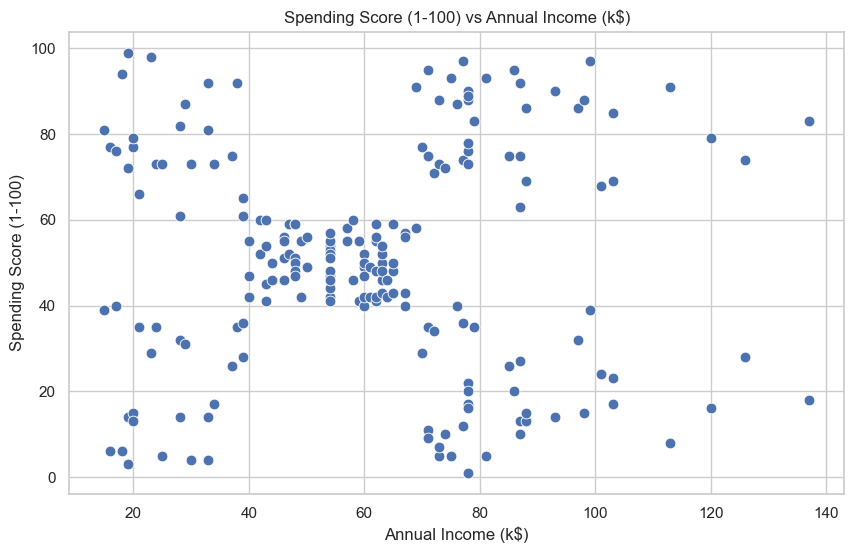

In [15]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = customer_data['Annual Income (k$)'],y = customer_data['Spending Score (1-100)'], s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [16]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

 ***Determining No. of Clusters Required***
 
 *Using the Elbow method for it.*

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(customer_data)
    wcss.append(km.inertia_)
np.array(wcss)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

array([269981.28      , 182440.30762987, 106348.37306211,  73679.78903949,
        44448.45544793,  37239.83554246,  30241.34361794,  25011.83934916,
        22816.67914205,  19775.97623126,  17553.82958735,  15952.8856357 ,
        14857.27753541,  12793.95169291,  11710.22283091,  11167.4764874 ,
        10427.3797854 ,   9624.47160298,   8426.84687469,   8170.27863894,
         7673.57978435,   7163.9629311 ,   6765.98627193,   6473.98431605,
         6144.09494479,   5642.32106782,   5454.99651051,   5309.41038724,
         4970.72233045])

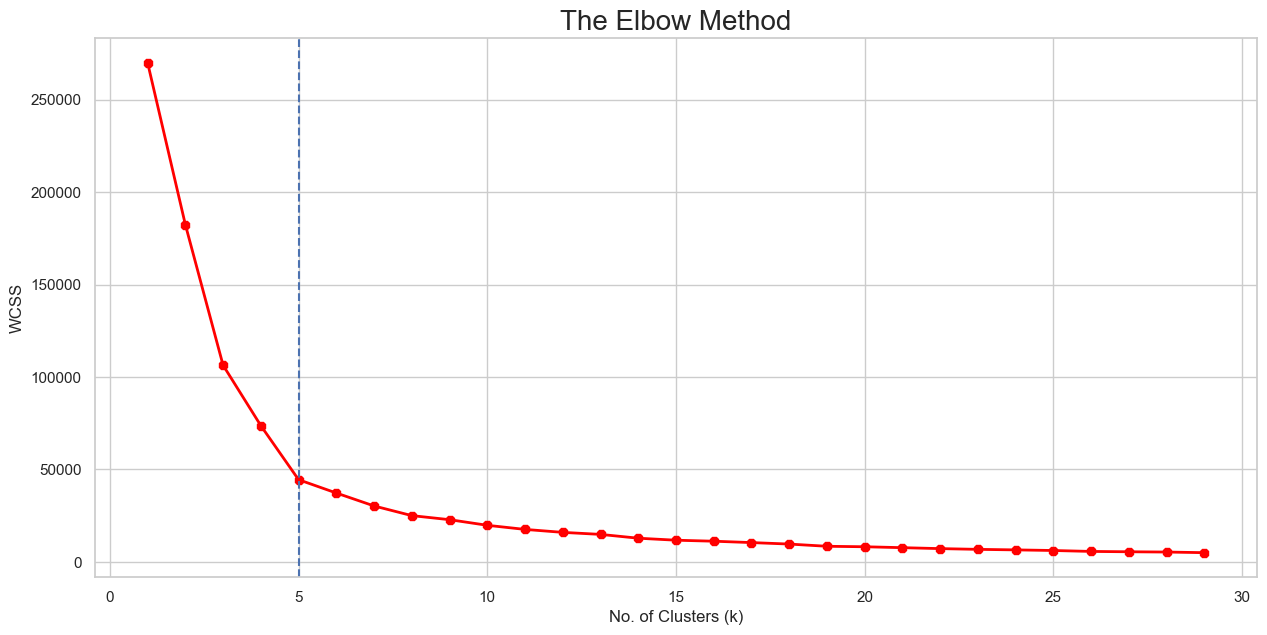

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [20]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(customer_data)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [21]:
clusters = customer_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(customer_data)
clusters.head()

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Annual Income (k$),Spending Score (1-100),Cluster_Prediction
0,15,39,2
1,15,81,0
2,16,6,2
3,16,77,0
4,17,40,2


In [22]:
kms.cluster_centers_        

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])

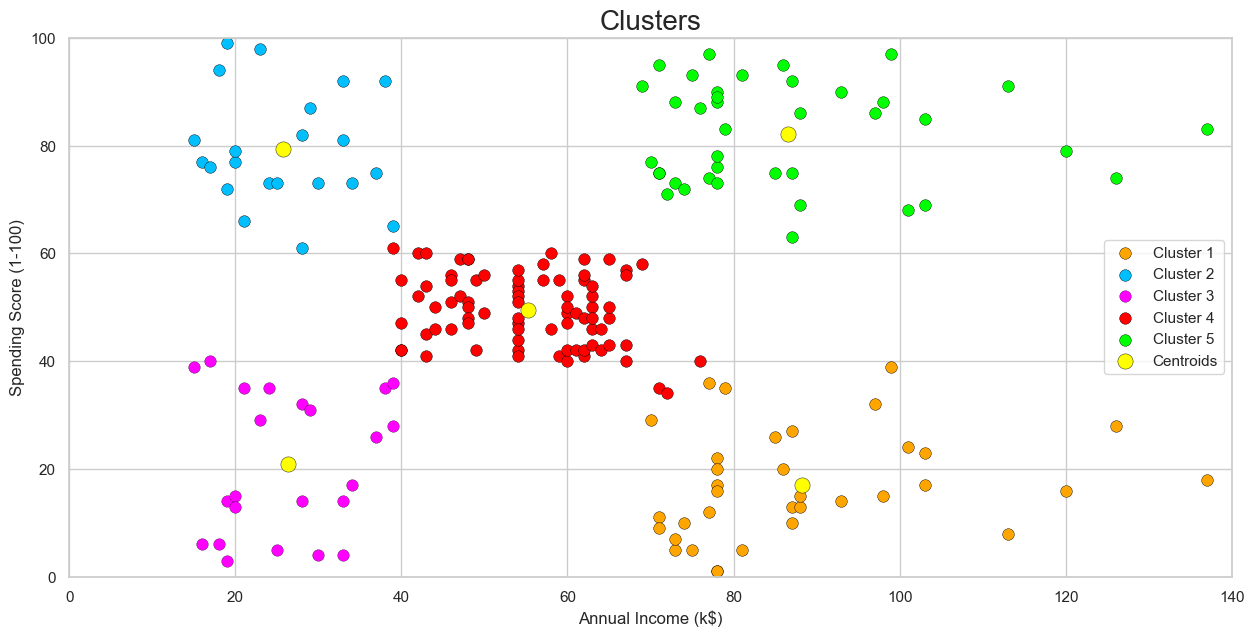

In [23]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters', fontsize = 20)
plt.show()

***Analysis***

Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the data. Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers. The following clusters are created by the model,

Cluster Orange

Cluster Purple

Cluster Red

Cluster Blue

Cluster Green

***Cluster Orange - Pinch Penny Customers :***
These are the customers who earn a lot of money but choose to spend money less. In other words, they can be the prime targets of the mall as they have a high potential to spend the money but maybe due to the mall's services or quality of products they choose not to do so. Hence the mall authorities will now try to have their favour on their side by adding new facilities.

***Cluster Purple - Balanced Customer :***

These are the customers who would have the minimum focus of the mall authorities as they earn less and spend less. They choose to spend the money wisely.

***Cluster Red - Normal Customer :***

Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

***Cluster Blue - Spenders :***

This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

***Cluster Green - Target Customers :***

Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.